# Customer Clustering with K-Means
You work for an e-commerce company, and your task is to group customers into distinct clusters based 
on their shopping behavior and preferences using the K-Means clustering algorithm. The dataset contains 
customer information, purchase history, and browsing data. Your goal is to create customer clusters for 
targeted marketing and personalized recommendations. Answer the following questions based on this 
case study:

# 1. Data Exploration:

a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe 
the features and the data distribution.

b. Discuss the importance of customer clustering in the e-commerce industry.

In [73]:
# Load the customer dataset using Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('sales.csv')
df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339


In [75]:
df.shape

(5000, 6)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [77]:
df.describe()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


Text(0.5, 1.0, 'Histogram of Quantity')

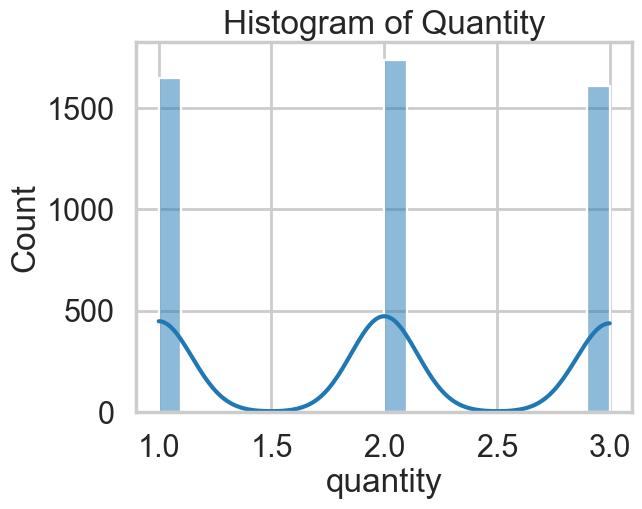

In [78]:
sns.histplot(df['quantity'], bins=20, kde=True)
plt.title('Histogram of Quantity')

<AxesSubplot: >

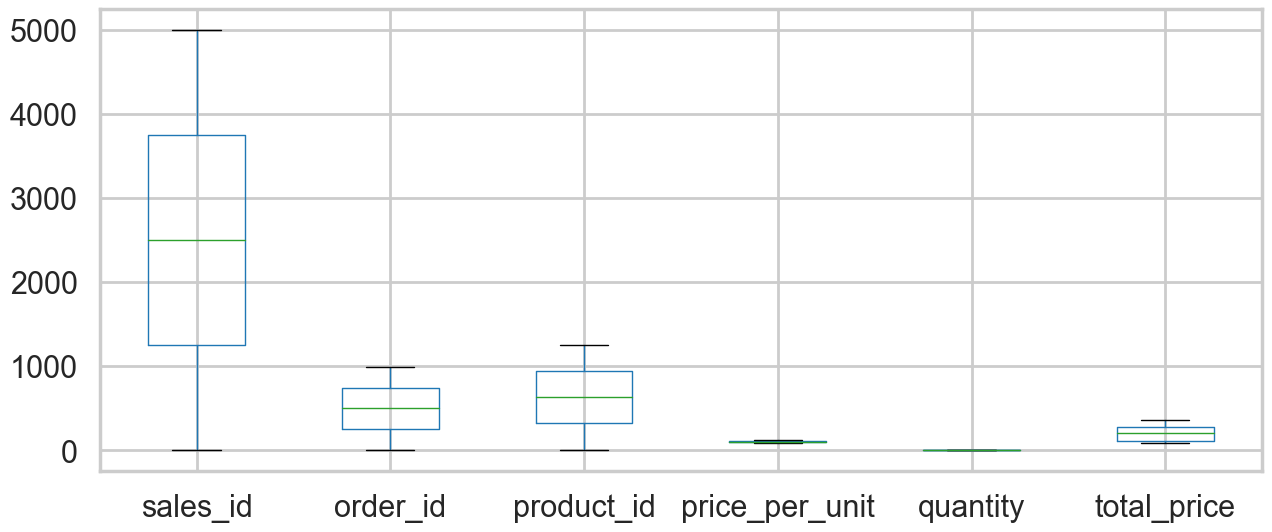

In [79]:
df.boxplot(figsize=(15,6))

<AxesSubplot: ylabel='count'>

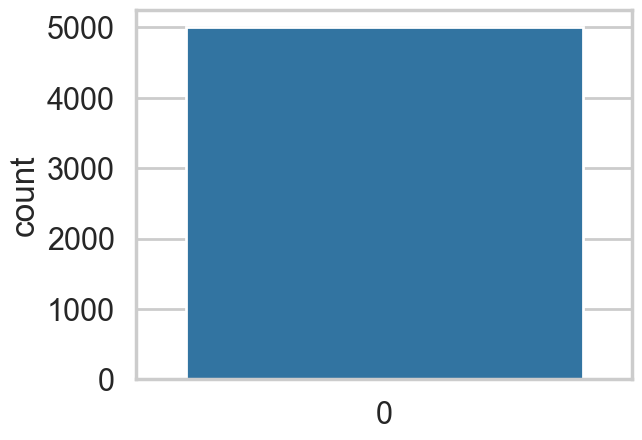

In [80]:
sns.countplot(df['quantity'])

In [81]:
df.corr()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
sales_id,1.000000,0.999953,-0.001371,-0.001624,0.012686,0.011228
order_id,0.999953,1.000000,-0.001160,-0.001667,0.012749,0.011283
product_id,-0.001371,-0.001160,1.000000,0.022051,0.009468,0.013958
price_per_unit,-0.001624,-0.001667,0.022051,1.000000,0.019318,0.232178
quantity,0.012686,0.012749,0.009468,0.019318,1.000000,0.973141
total_price,0.011228,0.011283,0.013958,0.232178,0.973141,1.000000


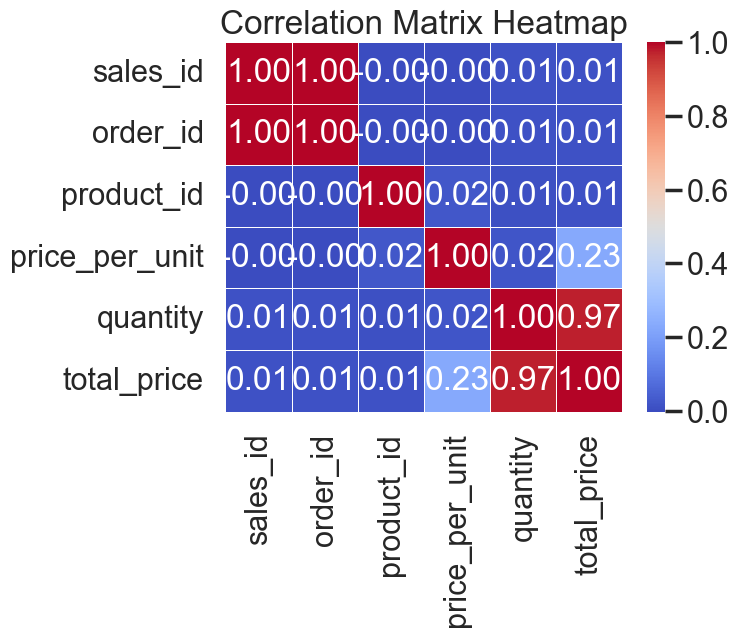

In [82]:
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 2. Data Preprocessing:

a. Prepare the customer data for clustering. Discuss the steps involved in data preprocessing, such as scaling, handling missing    values, and encoding categorical variables.

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,-1.731704,-1.755772,-1.145460,0.271740,0.009413,0.065316
1,-1.731012,-1.755772,-0.421379,1.576927,-1.229086,-1.023291
2,-1.730319,-1.755772,-1.740141,-0.815916,1.247911,0.945467
3,-1.729626,-1.755772,1.013015,0.271740,0.009413,0.065316
4,-1.728933,-1.755772,0.156783,1.033099,1.247911,1.536095


In [84]:
# Data preprocessing, such as scaling, handling missing values, and encoding categorical variables
df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

# 3. Implementing K-Means:

a. Implement the K-Means clustering algorithm using Python libraries like scikit-learn to cluster customers based on their          features.

b. Choose an appropriate number of clusters (K) for the algorithm and explain your choice.

In [85]:
# Implement the K-Means clustering algorithm using Python libraries

from sklearn.cluster import KMeans

clust = KMeans(n_clusters=3)
clust.fit(df)

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [86]:
clust.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [87]:
clust.inertia_

17639.38051445983

In [88]:
clust.n_clusters

3

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

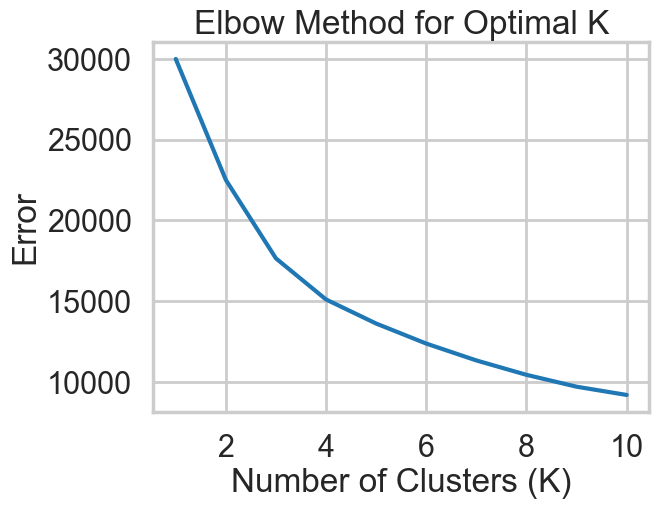

In [89]:
# Choose an appropriate number of clusters (K) for the algorithm and explain your choice

# Elbow Method to find the optimal number of clusters
y = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=10)
    km.fit(df)
    y.append(km.inertia_)
    
plt.figure()
plt.plot(range(1, 11), y)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Error')
plt.show()

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'size')

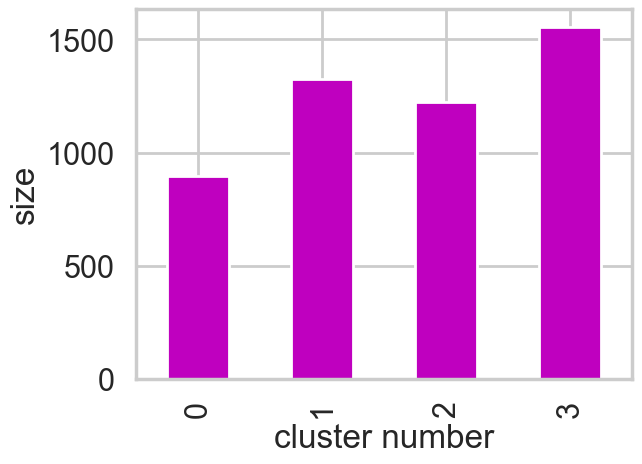

In [90]:
cluster = KMeans(n_clusters=4, random_state=20)
df['cluster']=cluster.fit_predict(df)
df.cluster.value_counts().sort_index().plot(kind = 'bar', color = 'm')
plt.xlabel('cluster number')
plt.ylabel('size')

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

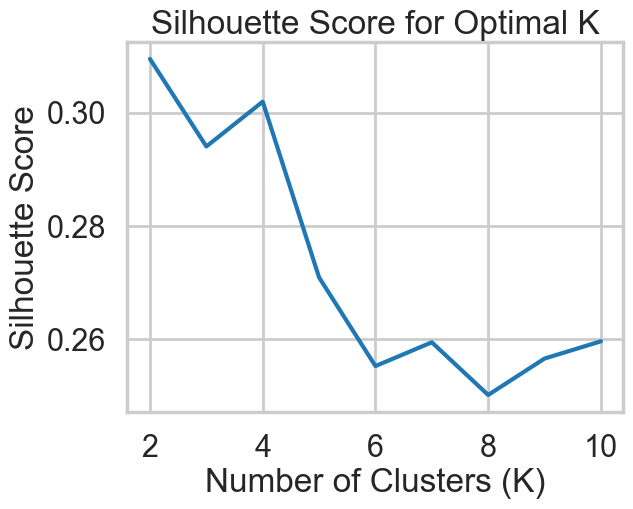

In [91]:
from sklearn.metrics import silhouette_score

# Silhouette Score for different values of K
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, cluster_labels))

# Plot the Silhouette Score graph
plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# 4. Model Training:

a. Train the K-Means model using the preprocessed customer dataset.

b. Discuss the distance metric used for cluster assignment and its significance in customer clustering.

In [92]:
# Train the K-Means model using the preprocessed customer dataset

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=10)
df['cluster'] = kmeans.fit_predict(df)
df.head()

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sales_id,order_id,product_id,price_per_unit,quantity,total_price,cluster
0,-1.731704,-1.755772,-1.145460,0.271740,0.009413,0.065316,0
1,-1.731012,-1.755772,-0.421379,1.576927,-1.229086,-1.023291,2
2,-1.730319,-1.755772,-1.740141,-0.815916,1.247911,0.945467,0
3,-1.729626,-1.755772,1.013015,0.271740,0.009413,0.065316,0
4,-1.728933,-1.755772,0.156783,1.033099,1.247911,1.536095,0


# 5. Customer Clustering:

a. Assign customers to their respective clusters based on their features.

b. Visualize the customer clusters and analyze the characteristics of each cluster.

In [94]:
# Assign customers to their respective clusters based on their features

print(df.head())
cluster_counts = df['cluster'].value_counts()
print("\nNumber of customers in each cluster:")
print(cluster_counts)

   sales_id  order_id  product_id  price_per_unit  quantity  total_price  \
0 -1.731704 -1.755772   -1.145460        0.271740  0.009413     0.065316   
1 -1.731012 -1.755772   -0.421379        1.576927 -1.229086    -1.023291   
2 -1.730319 -1.755772   -1.740141       -0.815916  1.247911     0.945467   
3 -1.729626 -1.755772    1.013015        0.271740  0.009413     0.065316   
4 -1.728933 -1.755772    0.156783        1.033099  1.247911     1.536095   

   cluster  
0        0  
1        2  
2        0  
3        0  
4        0  

Number of customers in each cluster:
2    1716
1    1707
0    1577
Name: cluster, dtype: int64


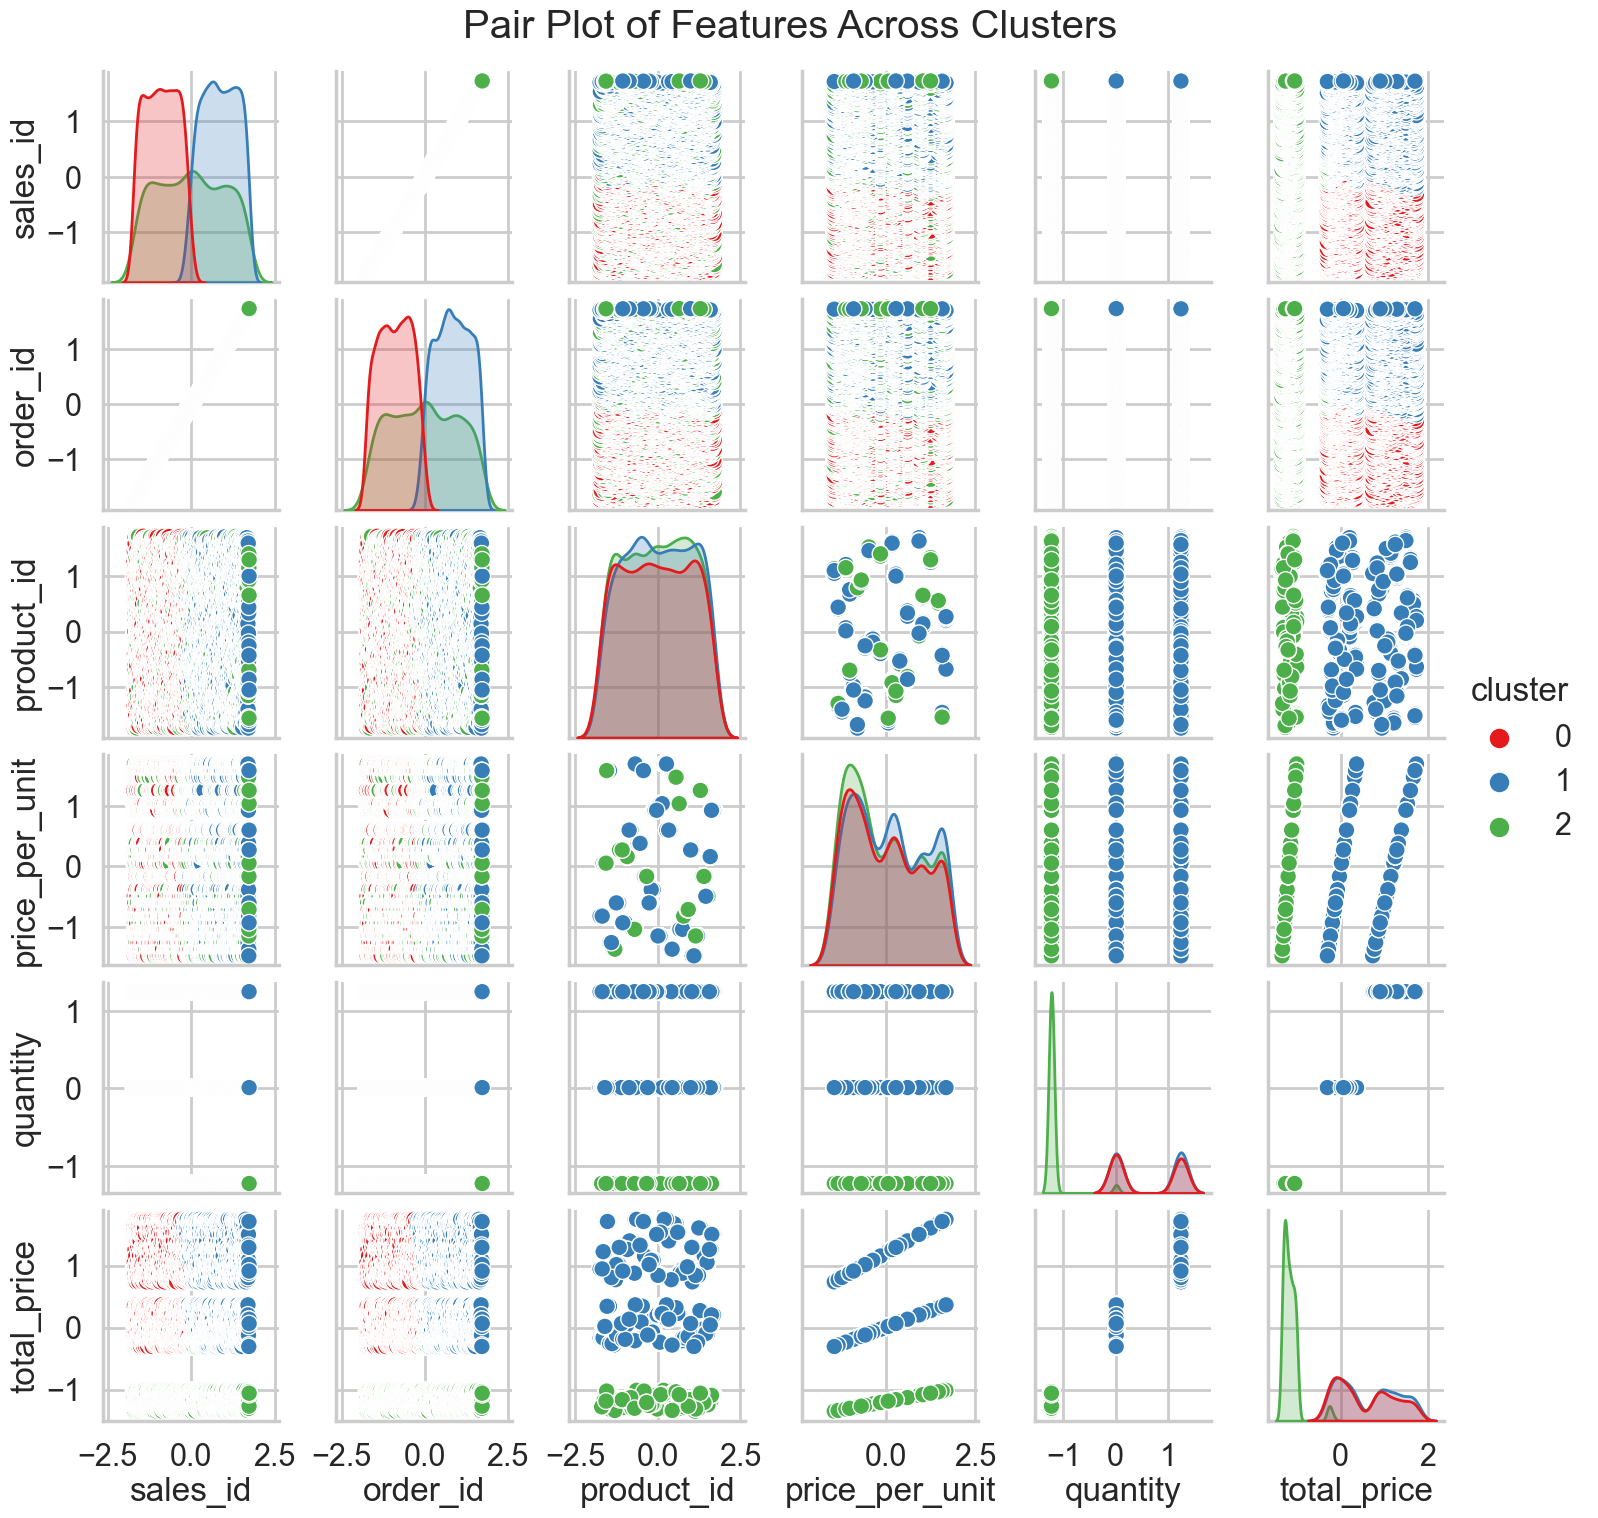

In [95]:
# Visualize the customer clusters and analyze the characteristics

sns.pairplot(df, hue='cluster', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot of Features Across Clusters', y=1.02)
plt.show()

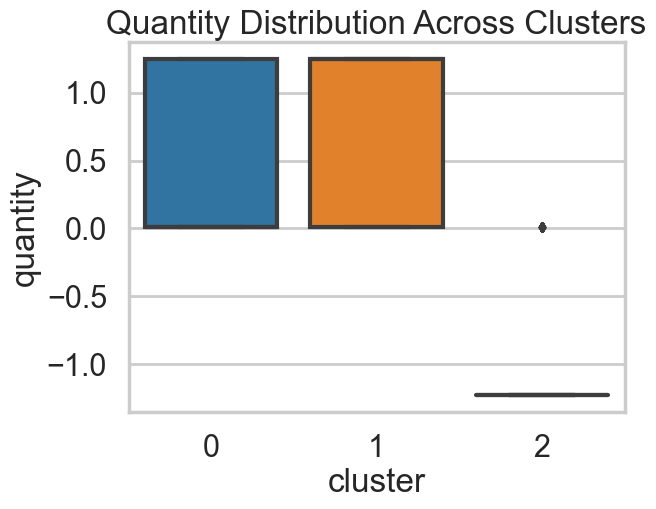

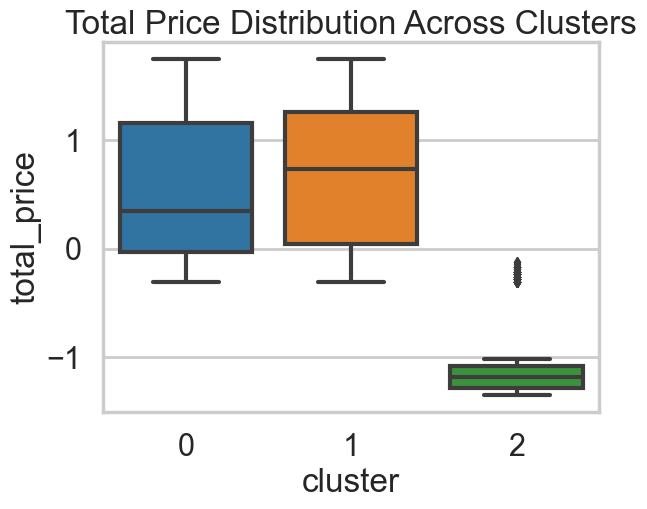

In [96]:
sns.boxplot(x='cluster', y='quantity', data=df)
plt.title('Quantity Distribution Across Clusters')
plt.show()

# Box plot for total_price across clusters
sns.boxplot(x='cluster', y='total_price', data=df)
plt.title('Total Price Distribution Across Clusters')
plt.show()

# 6. Performance Metrics:

a. Explain the concept of silhouette score and how it is used to evaluate the quality of clustering.

b. Calculate the silhouette score for the customer clusters and interpret the results.

In [97]:
# Calculate the silhouette score for the customer clusters and interpret the results

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.29211660700325276


# 7. Hyperparameter Tuning:

a. Describe the impact of the number of clusters (K) on the performance of K-Means and suggest strategies for selecting the        optimal value of K.

b. Conduct hyperparameter tuning for the K-Means model and discuss the impact of different values of K on clustering results.

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

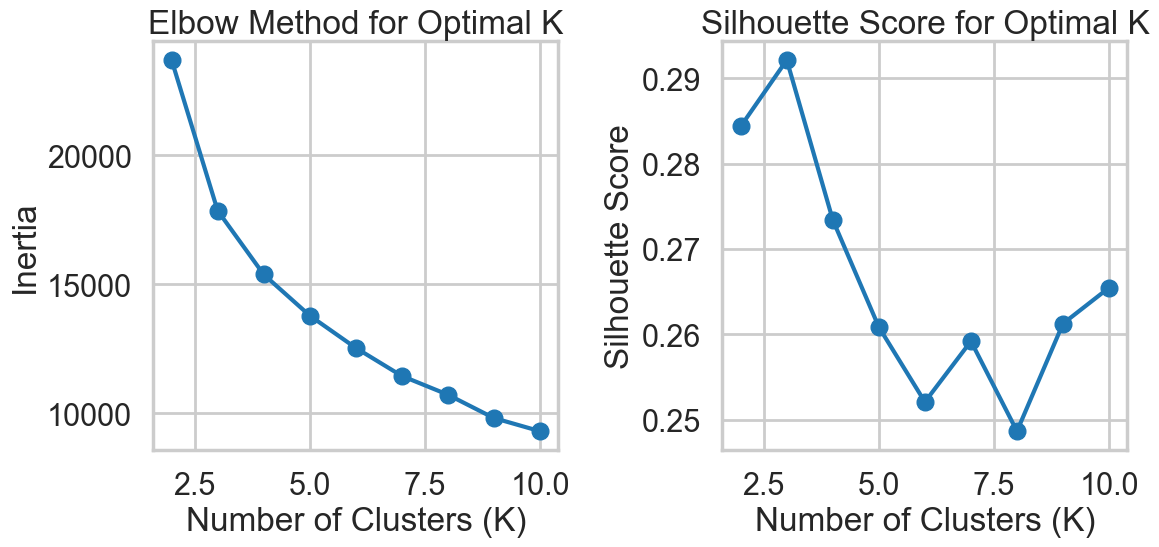

In [99]:
# Conduct hyperparameter tuning for the K-Means model and discuss the impact of different values of K on clustering results

inertia = []
silhouette_scores = []
k_values = range(2, 11)

# Hyperparameter tuning using the Elbow Method and Silhouette Score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))
plt.figure(figsize=(12, 6))

# Elbow Method graph
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Silhouette Score graph
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# 8. Real-World Application:

a. Describe the practical applications of customer clustering in the e-commerce industry.

b. Discuss how customer clustering can lead to improved customer engagement, targeted marketing, and personalized                  recommendations.

# 9. Model Limitations:

a. Identify potential limitations of the K-Means clustering algorithm in customer segmentation and discuss scenarios in which it    may not perform well.

# 10. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the e-commerce company.            Highlight the significance of customer clustering and the role of K-Means in personalized marketing.

In this case study, you are required to demonstrate your ability to use the K-Means clustering algorithm for customer segmentation, understand the importance of performance metrics like silhouette score, and communicate the practical applications of customer clustering in the e-commerce sector.